# Welcome! To Code execution testing colab for Data Analysis Tasks!
### How to use
1. Make a copy of this file (*File -> Save copy in drive*).
2. Rename your copy whit this convention:
  1. *( id for the task ).ipynb*
  2. For example: *DCA1.ipynb*
2. Install the libraries.
3. Open the [Drive in the sheets](https://drive.google.com/drive/folders/1a7_txX6YoAqOqI7XBxg4B7VqOerrm_dn)
4. Read the instructions for mount this Drive.
5. Create your code according to the instructions.
6. When you finish, run the code, and save the colab (Ctrl + s).
7. Go to Share --> *Select **Anyone with the link** --> Editor*
8. Paste the link to the colab in the sheets for tasking in the column **Colab Link**

### Useful Docs
1. [Matplotlib usage examples](https://colab.research.google.com/notebooks/charts.ipynb#scrollTo=xNzEBRkzL3B0)
2. [PEP8-Style Guide For Python](https://peps.python.org/pep-0008/)


In [1]:
!pip install matplotlib mpmath numpy pandas sympy bokeh

## Code Execution
When you make the copy, you can use the code block below to execute your code.

## How to Add shared folder with me on personal gdrive.


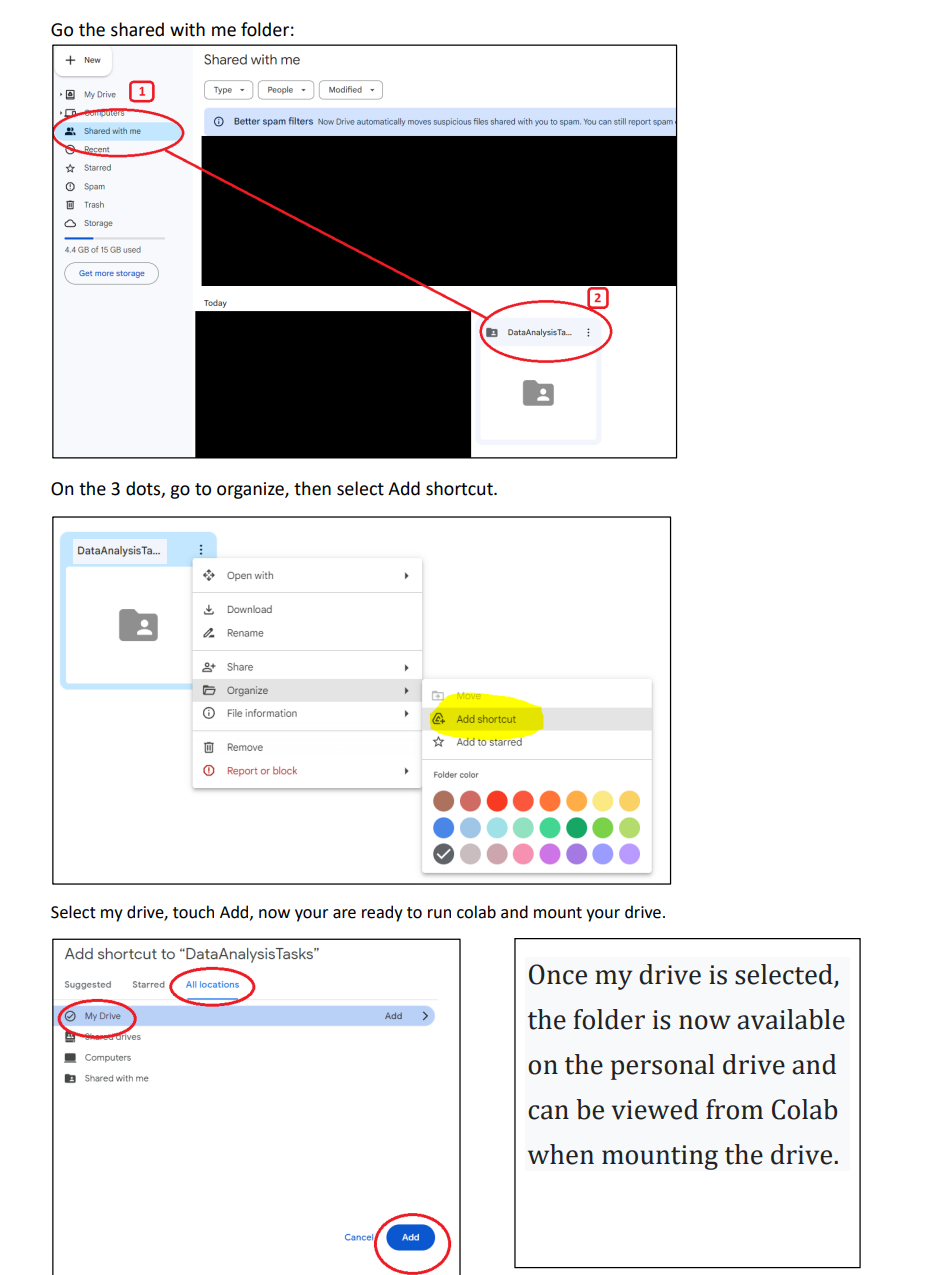

In [2]:
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)


Mounted at /content/gdrive


EXAMPLE FOR TEST THE CORRECT MOUNT OF GDRIVE

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

try:
    # Read the workout data from the CSV file
    df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/company_dataset.csv")
    df.head()
    print("CSV file loaded successfully, you can start working right now")
except Exception as e:
    print(f"An error occurred while loading the CSV file: {e}, please check the correct mount of the shared folder")


CSV file loaded successfully, you can start working right now


## For interactive Bokeh plot this code has to be inside the cell of the Bokeh code.

In [4]:
from bokeh.io import output_notebook
output_notebook()

-------------------------------------------------------------------------------------------------------------------




---



**AFTER THIS POINT YOU CAN START WORKING**

---








In [5]:
import numpy as np
import pandas as pd
from pyproj import Transformer
from bokeh.io import output_notebook, show
from bokeh.layouts import row
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from bokeh.palettes import Category10_10
from bokeh.plotting import figure
from bokeh.tile_providers import Vendors
from bokeh.transform import factor_cmap


output_notebook()

# Load the CSV file
df = pd.read_csv("/content/gdrive/MyDrive/DataAnalysisTasks/Datasets/bigfoot_locations.csv", index_col="index")

# Sort event number
df.sort_values(by="number", inplace=True)

# Transform the coordinates to X,Y
transformer = Transformer.from_crs(crs_from="EPSG:4326", crs_to="EPSG:3857", always_xy=True)
df["x"], df["y"] = transformer.transform(df["longitude"].values, df["latitude"].values)

# Drop inf values after transformation
df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

# Create an object from the `ColumnDataSource` class
source = ColumnDataSource(df)

# Create the linked table with the same information as the DataFrame
columns = []
for c in df.columns:
    columns.append(TableColumn(field=f"{c}", title=f"{c}"))

table = DataTable(source=source,
                  columns=columns,
                  editable=True,
                  aspect_ratio="auto")

# Create a figure and add the `tap` tool
map = figure(title="Bigfoot locations",
             width=800,
             height=600,
             x_axis_type="mercator",
             y_axis_type="mercator",
             tools="tap, pan,box_zoom,wheel_zoom,save,reset,help"
            )

# Assign colors to event classes
index_cmap = factor_cmap("classification",
                         palette=Category10_10,
                         factors=sorted(df.classification.unique()))

# Draw locations in the map
map.scatter(x="x",
            y="y",
            source=source,
            size=5,
            color=index_cmap,
            line_color=None)

# Add the Positron map from Carto as tile
map.add_tile(Vendors.CARTODBPOSITRON)

# Display the map using show function
show(row(map, table))